In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

In [5]:
class LogisticRegression():
    def __init__(self, alpha=0.01, iterations=1000):
        self.iterations = iterations
        self.alpha = alpha
        self.w = None
        self.b = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def logLoss(self, y, yhat):
        return -(y * np.log(yhat)) - ((1 - y) * np.log(1 - yhat))


    def compute_cost(self, y, yhat):
        m = len(y)
        cost = np.sum(self.logLoss(y, yhat)) / m
        return cost
    
    def gradientDescent(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0
        cost_history = [] 

        for i in range(self.iterations):
            z = np.dot(X, self.w) + self.b
            yhat = self.sigmoid(z)
            
            dw = (1 / m) * np.dot(X.T, (yhat - y))
            db = (1 / m) * np.sum(yhat - y)
            
            # Update weights and bias
            self.w -= self.alpha * dw
            self.b -= self.alpha * db

            cost = self.compute_cost(y, yhat)
            cost_history.append(cost)
    
        return cost_history
    
    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        yhat = self.sigmoid(z)
        pred_class = [1 if p >= 0.50 else 0 for p in yhat]
        return np.array(pred_class)
    
    def accuracy(self, y, yhat):
        correct_predictions = np.sum(y == yhat)
        accuracy = correct_predictions / len(y)
        return accuracy
    
    def precision(self, y, yhat):
        tp = np.sum((y == 1) & (yhat == 1))
        fp = np.sum((y == 0) & (yhat == 1))
        if (tp + fp) == 0:
            return 0
        return tp / (tp + fp)
    
    def recall(self, y, yhat):
        tp = np.sum((y == 1) & (yhat == 1))
        fn = np.sum((y == 1) & (yhat == 0))
        if (tp + fn) == 0:
            return 0
        return tp / (tp + fn)
    
    def f1_score(self, y, yhat):
        prec = self.precision(y, yhat)
        rec = self.recall(y, yhat)
        if (prec + rec) == 0:
            return 0
        return 2 * (prec * rec) / (prec + rec)
    
    def confusion_matrix(self, y_true, y_pred):
        # Compute confusion matrix components
        TP = np.sum((y_true == 1) & (y_pred == 1))
        TN = np.sum((y_true == 0) & (y_pred == 0))
        FP = np.sum((y_true == 0) & (y_pred == 1))
        FN = np.sum((y_true == 1) & (y_pred == 0))
        
        # Create confusion matrix
        cm = np.array([[TN, FP],
                       [FN, TP]])
        return cm

    def plot_confusion_matrix(self, y_true, y_pred):
        cm = self.confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(7, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

    def plot_roc_auc(self, X_test, y_test):
        # Predict probabilities
        y_prob = self.sigmoid(np.dot(X_test, self.w) + self.b)
        
        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc='lower right')
        plt.show()

In [6]:
df = pd.read_csv('../Logistic_Regression/diabetes2.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Normalizing/Scaling data
scaler = StandardScaler()
columns_to_scale = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [8]:
# Splitting features and labels
X = df.drop('Outcome', axis=1)  # Input Features
y = df['Outcome']  # Labels

In [9]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Initialize and train the model
model = LogisticRegression(alpha=0.1, iterations=1000)
cost_history = model.gradientDescent(X_train, y_train)

In [11]:
# Make predictions
y_pred = model.predict(X_test)

In [12]:
# Print the weights and bias with corresponding feature names
print("Weights and Bias:")
feature_names = X.columns
for feature, weight in zip(feature_names, model.w):
    print(f"{feature}: {weight:.4f}")
print(f"\nBias: {model.b:.4f}")

Weights and Bias:
Pregnancies: 0.0562
Glucose: 1.0848
BloodPressure: -0.2669
SkinThickness: 0.0625
Insulin: -0.2030
BMI: 0.8050
DiabetesPedigreeFunction: 0.3749
Age: 0.4498

Bias: -1.2372


In [13]:
# Evaluate the model

accuracy = model.accuracy(y_test, y_pred)
precision = model.precision(y_test, y_pred)
recall = model.recall(y_test, y_pred)
f1 = model.f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.73
Precision: 0.62
Recall: 0.64
F1 Score: 0.63


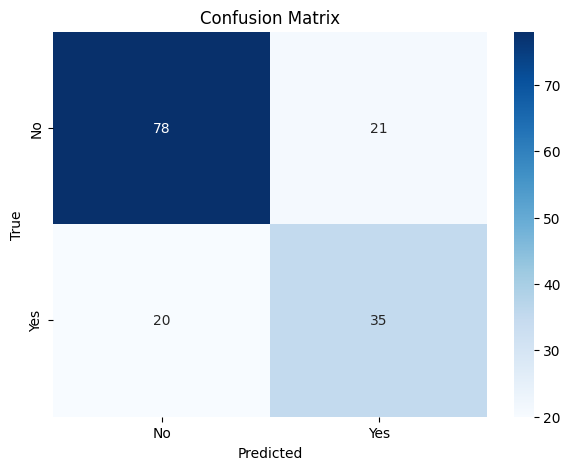

In [14]:
# Plot confusion matrix
model.plot_confusion_matrix(y_test, y_pred)

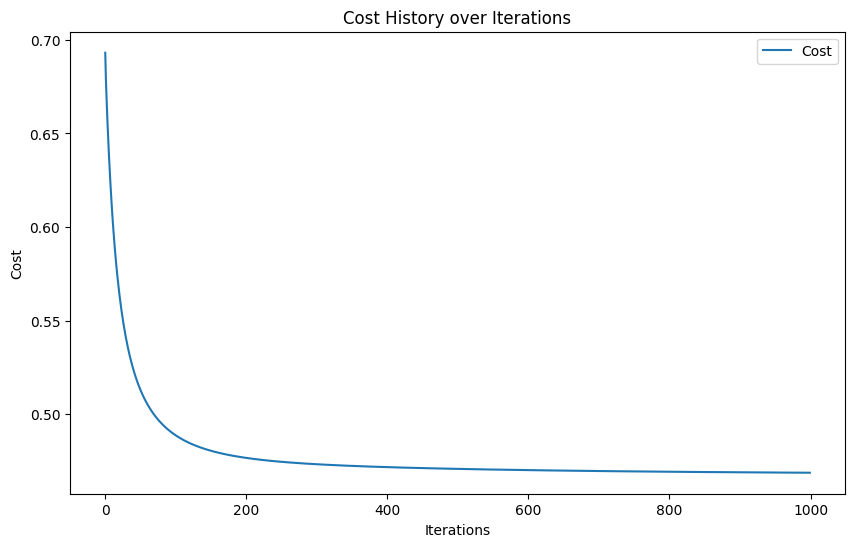

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history)), cost_history, label='Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History over Iterations')
plt.legend()
plt.show()

In [16]:
# Interpreting the results:

# MSE: Lower values of MSE indicate better model performance.
# It represents the average squared difference between the predicted and actual values.

# R-squared: This value ranges from 0 to 1, with higher values indicating a better fit.
# It represents the proportion of variance in the target variable explained by the model.
from sklearn.metrics import mean_squared_error, r2_score

mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print("MSE:", mse)
print("R2:", r2)

MSE: 0.2662337662337662
R2: -0.15959595959595996


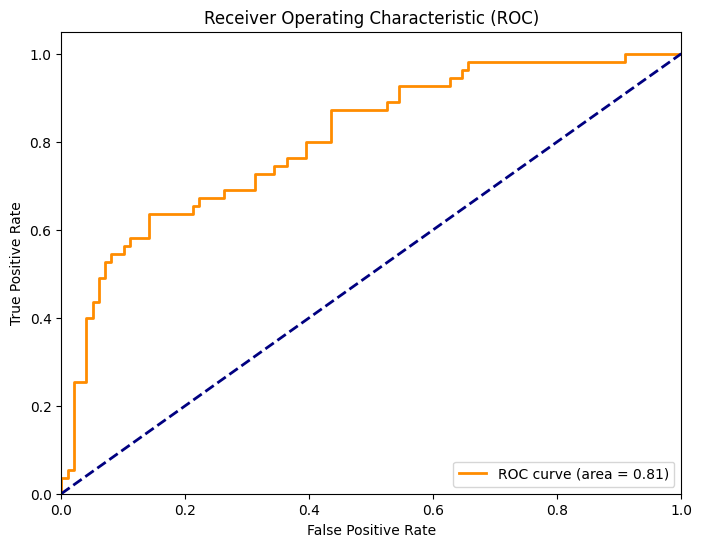

In [17]:
model.plot_roc_auc(X_test, y_test)

### **1. Model Performance**

- **Accuracy (0.72):** 
  - The model correctly classifies 72% of the instances. This is a decent accuracy but may indicate that there is room for improvement, depending on the context and the complexity of the dataset.

- **Precision (0.61):** 
  - Of all the instances predicted as positive, 61% are actually positive. This metric is important if you want to minimize false positives. In medical contexts, it means that among all patients predicted to have diabetes, 61% actually have it.

- **Recall (0.62):** 
  - Out of all actual positive instances, 62% are correctly identified by the model. This metric is crucial if you want to ensure that you are capturing as many positive cases as possible. In medical contexts, it indicates that 62% of actual diabetes cases are detected by the model.

- **F1 Score (0.61):** 
  - This is the harmonic mean of precision and recall, giving a single metric that balances both concerns. A score of 0.61 suggests a reasonable trade-off between precision and recall but shows that there’s potential for improvement.

### **2. Weights**

- **Positive Weights:**
  - **Glucose (0.7820), BMI (0.5387), Age (0.4658)** have the highest positive weights. This suggests that higher values in these features are associated with a higher probability of having diabetes. This aligns with medical knowledge, as high glucose levels, high BMI, and older age are known risk factors for diabetes.

- **Negative Weights:**
  - **Pregnancies (-0.0078), BloodPressure (-0.0757), SkinThickness (-0.0283), Insulin (-0.0310), DiabetesPedigreeFunction (-0.0882)** have negative weights, implying that higher values in these features are associated with a lower probability of having diabetes. However, the magnitudes of these weights are relatively small compared to the positive weights.

### **3. Bias**

- **Bias (-0.5467):** 
  - The bias term is negative, which shifts the decision boundary towards predicting the negative class. This means that the model will be less likely to classify an instance as positive unless the weighted sum of the features is sufficiently large. The negative bias suggests that, on average, the model tends to predict fewer positive cases.


### **4. Mean Squared Error (MSE) and R-Squared (R²) Interpretation**

#### **Mean Squared Error (MSE): 0.2792**

**Definition**: MSE measures the average squared difference between the predicted values and the actual values. It gives a sense of how well the model's predictions match the actual outcomes.
Interpretation: An MSE of 0.2792 indicates the average squared error per prediction. Lower MSE values signify better model performance, with a value close to 0 indicating high accuracy. In the context of logistic regression, MSE is not always the best metric, especially since it’s more commonly used for regression problems. For classification problems, metrics like accuracy, precision, recall, and F1 score are more relevant.

#### **R-Squared (R²): -0.2162**

**Definition**: R² measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1 for models that explain variance better than a baseline model, but it can be negative if the model performs worse than a baseline (e.g., predicting the mean of the target variable).
Interpretation: An R² value of -0.2162 indicates that the model is performing worse than a simple mean-based model. This negative value suggests that the model is not explaining any of the variance in the outcome variable and is actually performing worse than a model that would simply predict the mean of the outcome variable.

Accuracy (sklearn): 0.75
Precision (sklearn): 0.64
Recall (sklearn): 0.67
F1 Score (sklearn): 0.65


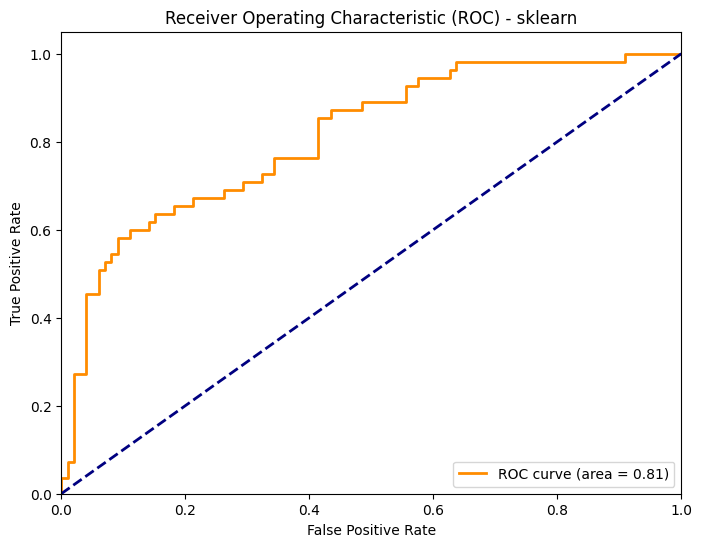

In [18]:
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the logistic regression model
sklearn_model = SklearnLogisticRegression(max_iter=1000, solver='liblinear')

# Fit the model to the training data
sklearn_model.fit(X_train, y_train)

# Make predictions
y_pred_sklearn = sklearn_model.predict(X_test)
y_prob_sklearn = sklearn_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Calculate evaluation metrics
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)
f1_sklearn = f1_score(y_test, y_pred_sklearn)

# Print evaluation metrics
print(f"Accuracy (sklearn): {accuracy_sklearn:.2f}")
print(f"Precision (sklearn): {precision_sklearn:.2f}")
print(f"Recall (sklearn): {recall_sklearn:.2f}")
print(f"F1 Score (sklearn): {f1_sklearn:.2f}")

# Compute ROC curve and AUC
fpr_sklearn, tpr_sklearn, _ = roc_curve(y_test, y_prob_sklearn)
roc_auc_sklearn = auc(fpr_sklearn, tpr_sklearn)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_sklearn, tpr_sklearn, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_sklearn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - sklearn')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.73
Precision: 0.62
Recall: 0.64
F1 Score: 0.63
Accuracy: 0.73
Precision: 0.62
Recall: 0.64
F1 Score: 0.63
Accuracy: 0.73
Precision: 0.62
Recall: 0.64
F1 Score: 0.63
Accuracy: 0.73
Precision: 0.62
Recall: 0.64
F1 Score: 0.63


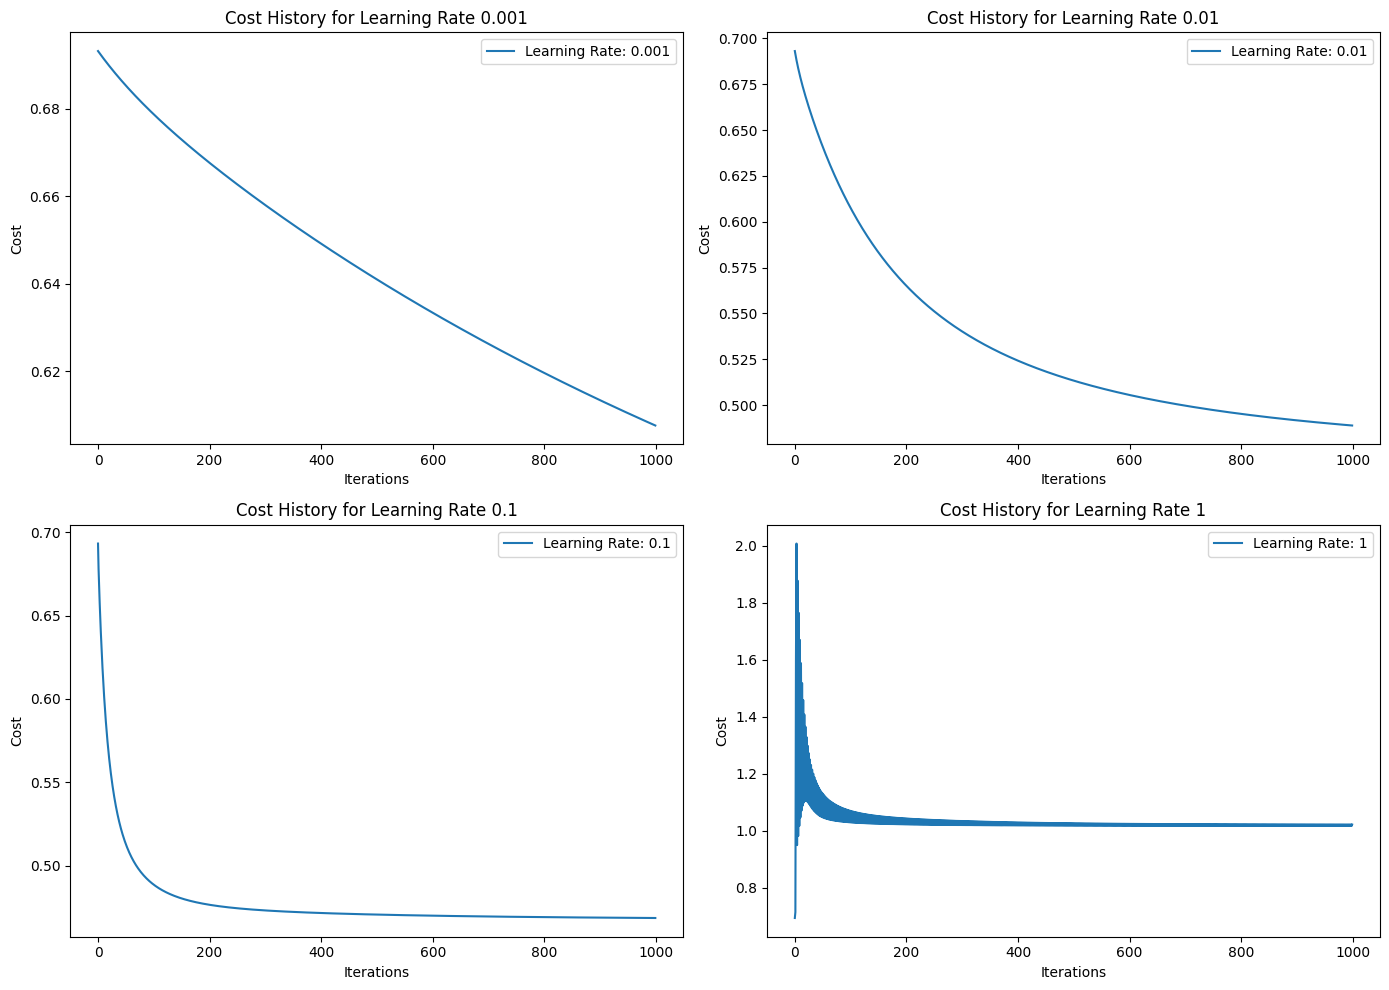

In [19]:
# Learning rates to compare
learning_rates = [0.001, 0.01, 0.1, 1]

# Number of iterations
num_iterations = 1000

# Subplots for different learning rates
plt.figure(figsize=(14, 10))

for i, lr in enumerate(learning_rates):
    model.alpha = lr
    model.iterations = num_iterations
    cost_history = model.gradientDescent(X_train, y_train)
    
    plt.subplot(2, 2, i + 1)
    plt.plot(range(num_iterations), cost_history, label=f'Learning Rate: {lr}')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title(f'Cost History for Learning Rate {lr}')
    plt.legend()

    # Evaluate the model

    accuracy = model.accuracy(y_test, y_pred)
    precision = model.precision(y_test, y_pred)
    recall = model.recall(y_test, y_pred)
    f1 = model.f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

plt.tight_layout()
plt.show()

## Feature Selection based on Weights

In [20]:
X = df[['Glucose', 'BMI', 'Age']]

In [21]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Initialize and train the model
model = LogisticRegression(alpha=0.1, iterations=1000)
cost_history = model.gradientDescent(X_train, y_train)

In [23]:
# Print the weights and bias with corresponding feature names
print("Weights and Bias:")
feature_names = X.columns
for feature, weight in zip(feature_names, model.w):
    print(f"{feature}: {weight:.4f}")
print(f"\nBias: {model.b:.4f}")

Weights and Bias:
Glucose: 0.9888
BMI: 0.7462
Age: 0.5132

Bias: -0.8643


In [24]:
# Evaluate the model

accuracy = model.accuracy(y_test, y_pred)
precision = model.precision(y_test, y_pred)
recall = model.recall(y_test, y_pred)
f1 = model.f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.73
Precision: 0.62
Recall: 0.64
F1 Score: 0.63


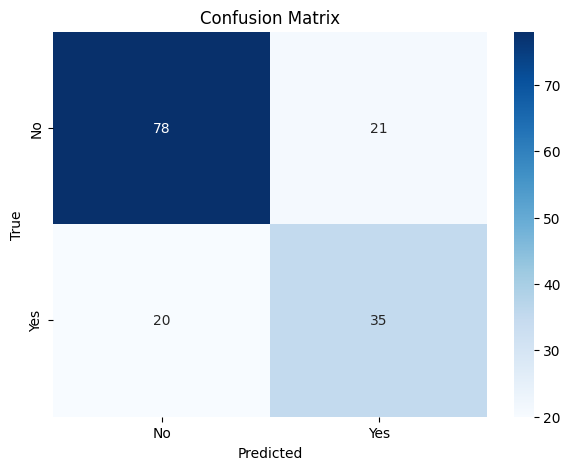

In [25]:
# Plot confusion matrix
model.plot_confusion_matrix(y_test, y_pred)

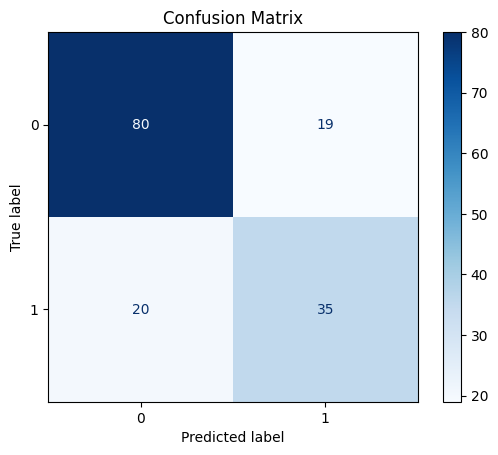

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make predictions using your model
y_pred = model.predict(X_test)

# Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
